In [3]:
import numpy as np
import ROOT as r

rng = r.TRandom3()

nums = []
for i in range(0, 10000):
    s = []
    for j in range(0,1000):
        s.append(rng.Uniform(1))
    nums.append(s)

numarray = np.array(nums)


In [4]:
means = []
for i in range(0, 10000):
    means.append(numarray[i].mean())       

In [5]:
stdDevs = []
for i in range(0, 10000):
    stdDevs.append(numarray[i].std()) 

In [15]:
histogramData = r.TH1F("Stats", "A histogram of data", 20, 0, 1)

for i in range(0,10000):
    for j in range(0, 1000):
        histogramData.Fill(nums[i][j])
r.gStyle.SetOptFit(1111)
r.gStyle.SetStatH(0.1)   
r.gStyle.SetStatW(0.1)   
histogramData.Draw()       

Warning in <TROOT::Append>: Replacing existing TH1: Stats (Potential memory leak).


 FCN=20.1462 FROM MIGRAD    STATUS=CONVERGED      36 CALLS          37 TOTAL
                     EDM=1.09671e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant    -3.92354e-03   6.33060e-04   7.10045e-07   1.48091e-02
   2  Slope       -1.64878e-04   1.09687e-03   1.23025e-06   7.45577e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


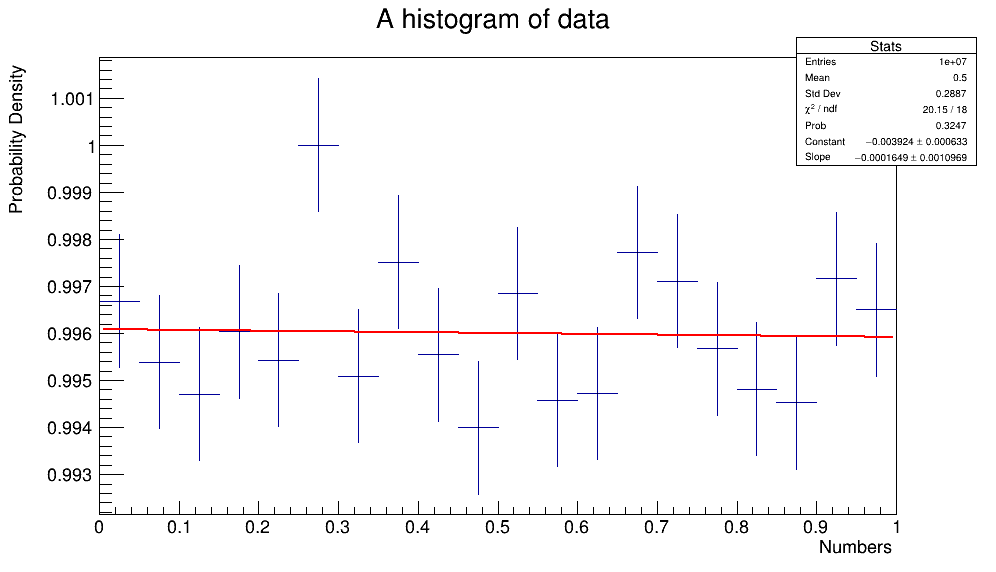

In [16]:
bin_width = histogramData.GetBinWidth(1)
integral = histogramData.Integral()

if integral > 0:
    # Normalize the histogram to ensure total area is 1 (probability density)
    histogramData.Scale(1 / (integral * bin_width))

# Now adjust maximum value to ensure it's in the range [0, 1]
max_bin_content = histogramData.GetMaximum()

if max_bin_content > 1:
    histogramData.Scale(1 / max_bin_content)  # Scale down so the max value is 1
histogramData.GetXaxis().SetTitle("Numbers")
histogramData.GetYaxis().SetTitle("Probability Density")



histogramData.Fit("expo")
histogramData.GetXaxis().SetTitle("Numbers")
histogramData.GetYaxis().SetTitle("Probability Density")

# Draw the histogram
c = r.TCanvas("c", "Canvas", 1000, 600)
histogramData.Draw()
c.Update()
c.Draw()

 FCN=1.30393 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=4.53502e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.04413e+00   1.25196e-02   7.73909e-06   8.22995e-03
   2  Mean         6.66702e-01   8.60808e-05   3.17908e-07   2.78281e-01
   3  Sigma        8.54586e-03   5.71892e-05   1.38220e-06   4.06680e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


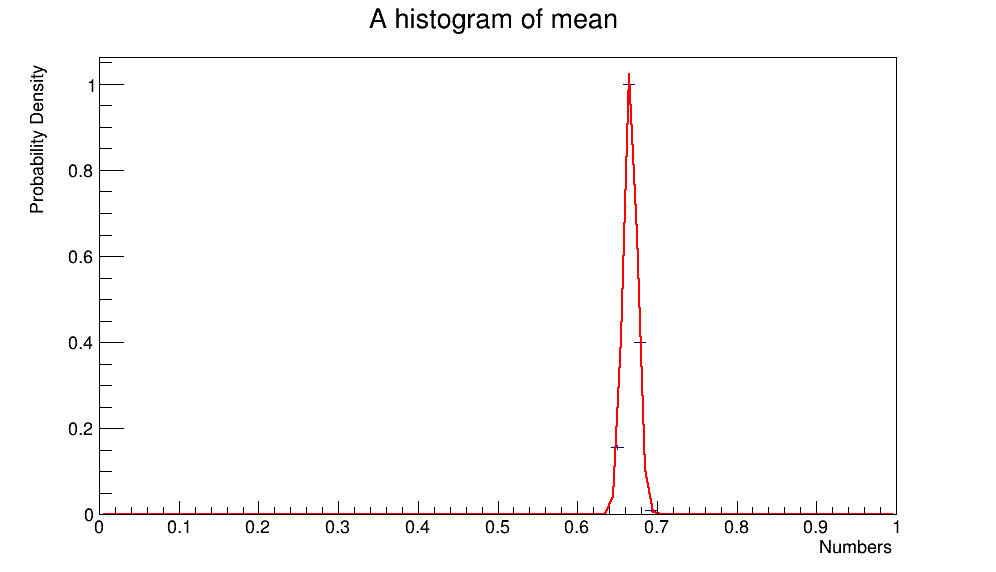

In [ ]:
bin_width = meanData.GetBinWidth(1)
integral = meanData.Integral()

if integral > 0:
    # Normalize the histogram to ensure total area is 1 (probability density)
    meanData.Scale(1 / (integral * bin_width))

# Now adjust maximum value to ensure it's in the range [0, 1]
max_bin_content = meanData.GetMaximum()

if max_bin_content > 1:
    meanData.Scale(1 / max_bin_content)  # Scale down so the max value is 1
meanData.Fit("gaus")

# Draw the histogram
c = r.TCanvas("c", "Canvas", 1000, 600)
meanData.Draw()
c.Update()
c.Draw()

In [17]:
meanData = r.TH1F("Stats", "A histogram of mean", 70, 0, 1)
meanData.GetXaxis().SetTitle("Numbers")
meanData.GetYaxis().SetTitle("Probability Density")
for i in range(0,10000):
    meanData.Fill(means[i]) 

r.gStyle.SetOptFit(1111)   
r.gStyle.SetStatH(0.1)   
r.gStyle.SetStatW(0.1)   

Warning in <TROOT::Append>: Replacing existing TH1: Stats (Potential memory leak).


 FCN=0.469725 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=3.25891e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.28776e+00   1.58775e-02   7.62308e-06   7.57271e-04
   2  Mean         5.00013e-01   9.91779e-05   2.38425e-07  -2.65094e-02
   3  Sigma        9.92844e-03   7.14119e-05   1.15000e-06   3.63469e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


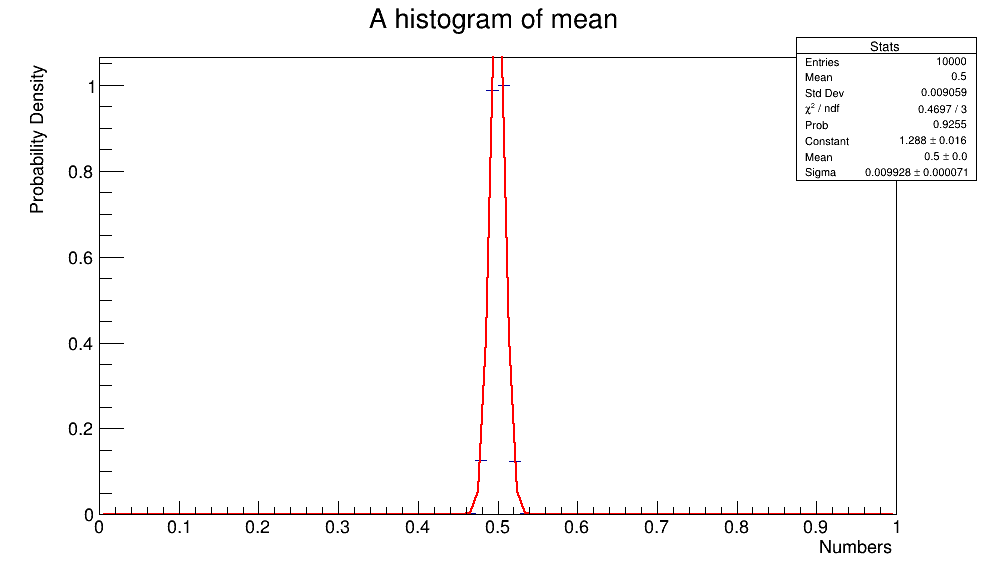

In [18]:
bin_width = meanData.GetBinWidth(1)
integral = meanData.Integral()

if integral > 0:
    # Normalize the histogram to ensure total area is 1 (probability density)
    meanData.Scale(1 / (integral * bin_width))

# Now adjust maximum value to ensure it's in the range [0, 1]
max_bin_content = meanData.GetMaximum()

if max_bin_content > 1:
    meanData.Scale(1 / max_bin_content)  # Scale down so the max value is 1



meanData.Fit("gaus")
# Draw the histogram
c = r.TCanvas("c", "Canvas", 1000, 600)
meanData.Draw()
c.Update()
c.Draw()

In [26]:
stdData = r.TH1F("Stats", "A histogram of Standard Devs", 70, 0, 1)
stdData.GetXaxis().SetTitle("Numbers")
stdData.GetYaxis().SetTitle("Probability Density")

for i in range(0,10000):
    stdData.Fill(stdDevs[i]) 

r.gStyle.SetOptFit(1111) 
r.gStyle.SetStatH(0.1)   
r.gStyle.SetStatW(0.1)    

Warning in <TROOT::Append>: Replacing existing TH1: Stats (Potential memory leak).


 FCN=2.51381e-07 FROM MIGRAD    STATUS=CONVERGED      95 CALLS          96 TOTAL
                     EDM=5.0285e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.45323e+00   3.42066e-02   7.09618e-06  -2.14941e-02
   2  Mean         2.88066e-01   7.67248e-05   1.37360e-07  -1.27717e+01
   3  Sigma        5.54186e-03   7.84917e-05   8.81742e-07  -1.53481e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


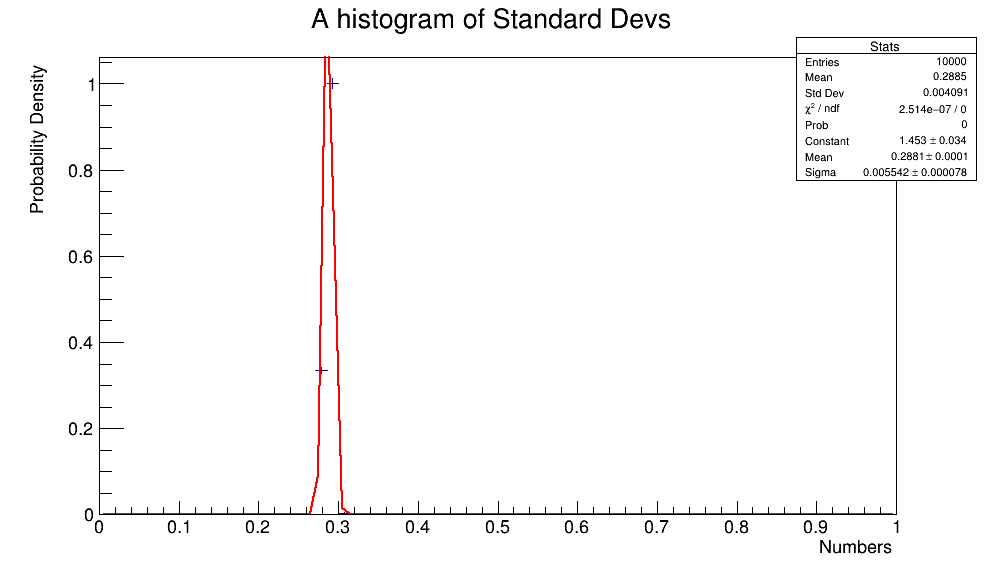

In [27]:
bin_width = stdData.GetBinWidth(1)
integral = stdData.Integral()

if integral > 0:
    # Normalize the histogram to ensure total area is 1 (probability density)
    stdData.Scale(1 / (integral * bin_width))

# Now adjust maximum value to ensure it's in the range [0, 1]
max_bin_content = stdData.GetMaximum()

if max_bin_content > 1:
    stdData.Scale(1 / max_bin_content)
stdData.Fit("gaus")
# Draw the histogram
c = r.TCanvas("c", "Canvas", 1000, 600)
stdData.Draw()
c.Update()
c.Draw()

In [ ]:
import math

meData = r.TH1F("Stats", "A histogram of Error in Mean", 70, 0, 0.01)
meData.GetXaxis().SetTitle("Numbers")
meData.GetYaxis().SetTitle("Probability Density")

for i in range(0,10000):
    meData.Fill(stdDevs[i]/math.sqrt(10000)) 

r.gStyle.SetOptStat(1111)  
r.gStyle.SetStatH(0.1)   
r.gStyle.SetStatW(0.1)   

Warning in <TROOT::Append>: Replacing existing TH1: Stats (Potential memory leak).


 FCN=2.51382e-07 FROM MIGRAD    STATUS=CONVERGED      95 CALLS          96 TOTAL
                     EDM=5.02851e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.45323e+00   3.42066e-02   7.09618e-06  -2.14942e-02
   2  Mean         2.88066e-03   7.67248e-07   1.37360e-09  -1.27717e+03
   3  Sigma        5.54186e-05   7.84917e-07   8.81742e-07  -1.53482e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


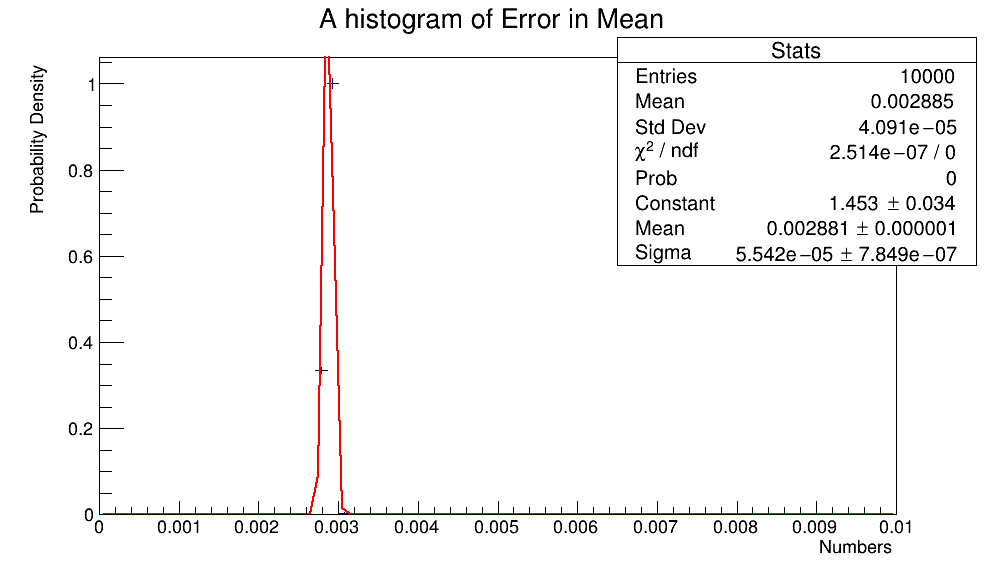

In [29]:
bin_width = meData.GetBinWidth(1)
integral = meData.Integral()

if integral > 0:
    # Normalize the histogram to ensure total area is 1 (probability density)
    meData.Scale(1 / (integral * bin_width))

# Now adjust maximum value to ensure it's in the range [0, 1]
max_bin_content = meData.GetMaximum()

if max_bin_content > 1:
    meData.Scale(1 / max_bin_content)  # Scale down so the max value is 1


meData.Fit("gaus")
# Draw the histogram
c = r.TCanvas("c", "Canvas", 1000, 600)
meData.Draw()
c.Update()
c.Draw()